In [1]:
import os, sys
BASE_PATH = os.path.dirname(os.path.abspath(''))
sys.path.append(BASE_PATH)

In [2]:
# from datagen.dg_cfg import dg_cfg
from sn6.model import BFE

Segmentation Models: using `keras` framework.
Learning rate schedule: 0.0032 to 0.0032 to 3e-06


In [3]:
tr_cfg = {
    # log cfg
    'RUN'           : 1,            # REMEMBER TO INCREMENT!!
    'COMMENTS'      : 'gpu experiments',
    
    # dataset cfg
    'IMAGE_RS'      : 320,          # target resolution
    'TRAIN_PATH'    : '../../image_folder/sn6-crop',    # kaggle ds name
    'TRAIN_SPLITS'  : ['fold0', 'fold1'],               # folds used for training
    'VAL_PATH'      : '../../image_folder/sn6-crop',    # if None, don't validate
    'VAL_SPLITS'    : ['fold4'],    # folds used for validation
    'SAR_CH'        : [1],          # HH=1, HV=2, VH=3, VV=4. use None to read all channel
    'ORIENT'        : 1,
    
    # model cfg
    'BACKBONE'      : 'effb4',      # 'effb4', 'res50'
    'ARC'           : 'fpn',        # 'unet', 'fpn'
    'WEIGHT'        : None,         # 'imagenet', 'pre-trained from:..', None
    
    # training cfg
    'SEED'          : 17,
    'BATCH_SIZE'    : 8,
    'SHUFFLE_BUFFER': 150,
    'EPOCHS'        : 60,
    'LF'            : 'dice',       # 'bce', 'jaccard_distance', 'focal', 'giou'
    'L_RATE'        : 32e-4,        # 32e-4, 4e-4, 5e-5
    'IS_CV'         : 0,            # cross validation
    'IS_3_FOLD'     : 0,            # do same training 3x to get an average value
    'IS_CB_ES'      : 0,            # early stopping
    'IS_CB_LRS'     : 0,            # learning rate scheduler, if false uses lr_ramp
    
    # reduce method: 'resize', 'pad_resize', 'random_crop', 'random_crop_resize'
    'REDUCE_RES'    : 'pad_resize',
    'COMB_REDUCE'   : True, # when using rand_crop or rand_crop_resize, randomize reduce method with pad_resize
    'VAL_REDUCE_RES': 'pad_resize',

    # spatial transformations
    'IS_HFLIP'      : 0,
    'IS_VFLIP'      : 0,
    'IS_ROT90'      : 0,
    'IS_FINE_ROT'   : 0,
    'IS_SHEAR_X'    : 0,
    'IS_SHEAR_Y'    : 0,

    # aug magnitude
    'ROT_RANGE'     : [-10, 10],
    'SHEAR_RANGE'   : [-10, 10],

    # pixel transformations
    'IS_MOT_BLUR'   : 0,
    'IS_SHARPEN'    : 0,
    'IS_CLAHE'      : 0,
    'IS_GAUS_NOISE' : 0,
    'IS_SPECKLE_NOISE': 0,
    'IS_COARSE_DO'  : 0,

    # offline augs
    'OFF_DS'        : '',   # 'elee', 'frost', 'gmap' NOT ADOPTED YET
    'OFF_AUG_PATH'  : '',
}

### comb reduce method

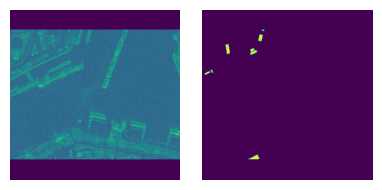

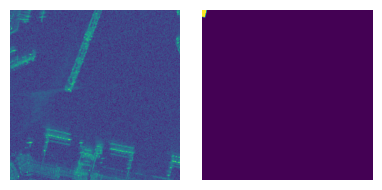

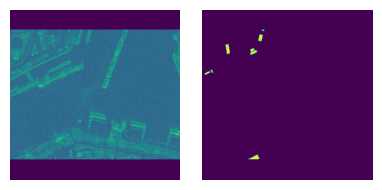

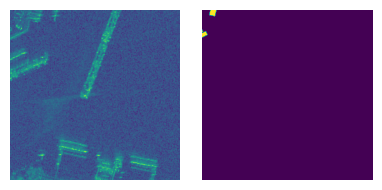

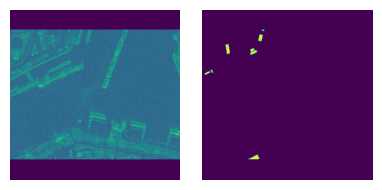

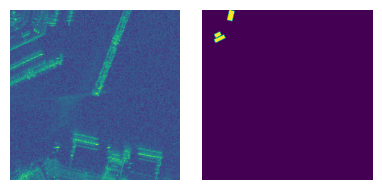

In [6]:
tr_cfg['REDUCE_RES'] = 'random_crop_resize'
tr_cfg['COMB_REDUCE'] = True
model = BFE(tr_cfg, is_log=False, project_name='sn6_aug')
model.load_data()
model.dataloader.preview_train_ds(n_show=1, n_rep=6, min_view=True)

# Reduce Method

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190804111224_20190804111453_tile_8685'


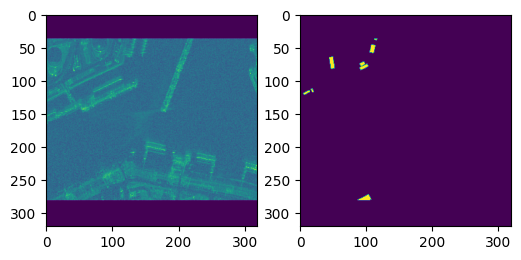

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190822152355_20190822152652_tile_3994'


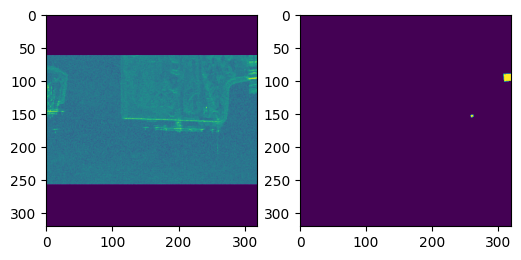

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190823075755_20190823080053_tile_10765'


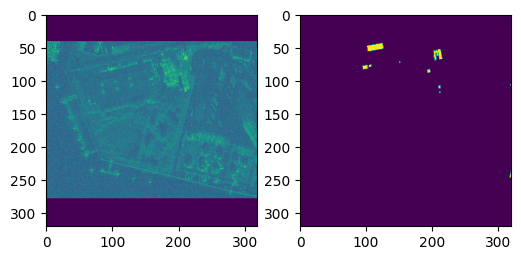

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190823065021_20190823065333_tile_9172'


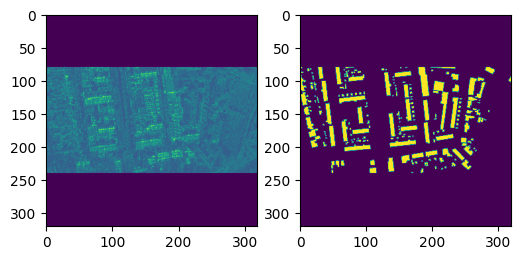

In [10]:
tr_cfg['REDUCE_RES'] = 'pad_resize'
model = BFE(tr_cfg, is_log=False, project_name='sn6_aug')
model.load_data()
model.dataloader.preview_train_ds(4)

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190804111224_20190804111453_tile_8685'


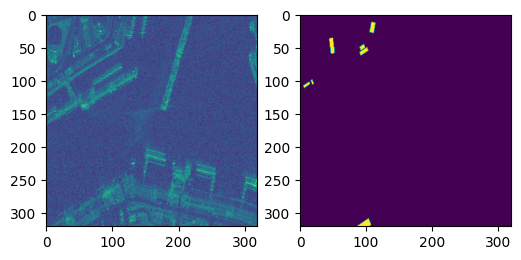

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190822152355_20190822152652_tile_3994'


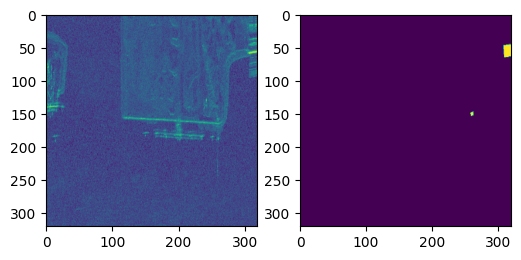

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190823075755_20190823080053_tile_10765'


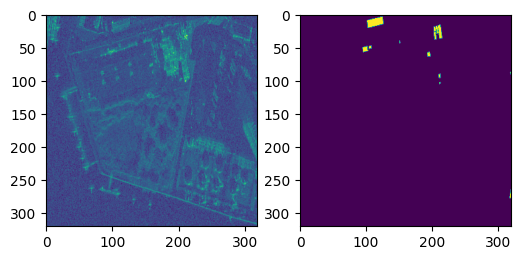

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190823065021_20190823065333_tile_9172'


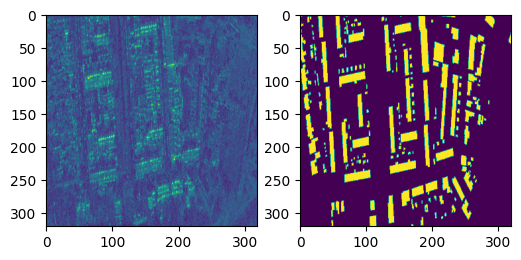

In [9]:
tr_cfg['REDUCE_RES'] = 'resize'
model = BFE(tr_cfg, is_log=False, project_name='sn6_aug')
model.load_data()
model.dataloader.preview_train_ds(4)

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190804111224_20190804111453_tile_8685'


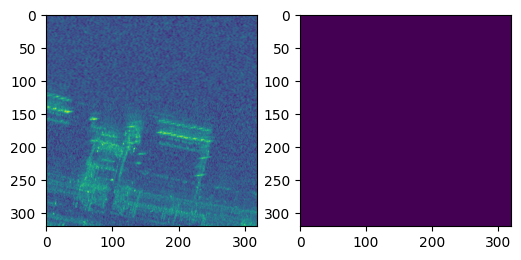

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190822152355_20190822152652_tile_3994'


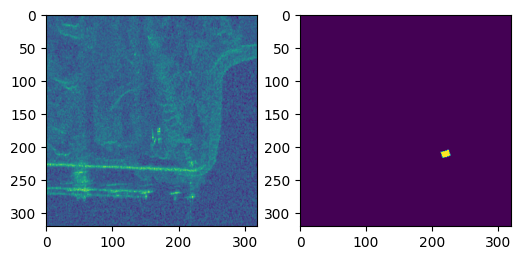

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190823075755_20190823080053_tile_10765'


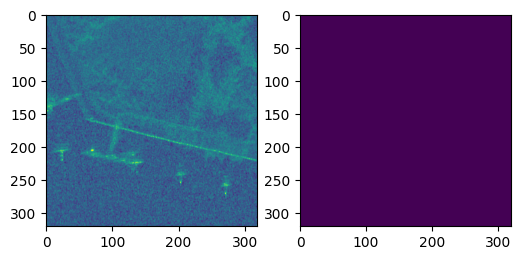

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190823065021_20190823065333_tile_9172'


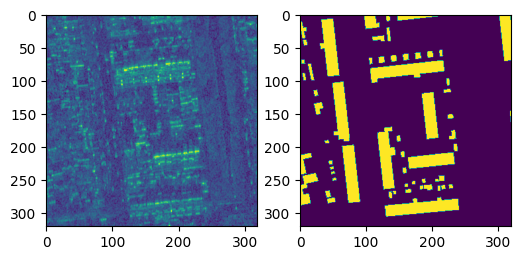

In [12]:
tr_cfg['REDUCE_RES'] = 'random_crop'
model = BFE(tr_cfg, is_log=False, project_name='sn6_aug')
model.load_data()
model.dataloader.preview_train_ds(4)

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190804111224_20190804111453_tile_8685'


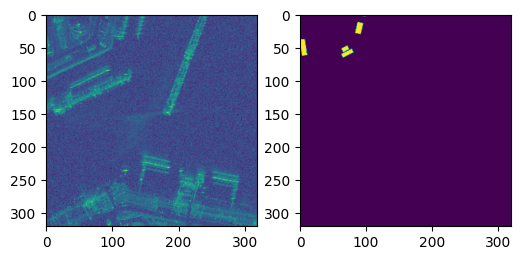

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190822152355_20190822152652_tile_3994'


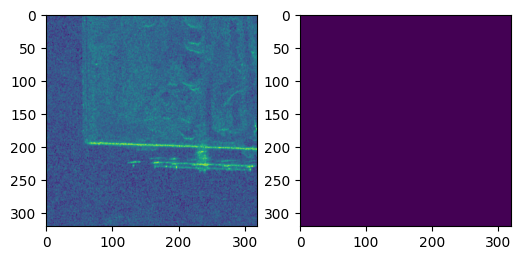

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190823075755_20190823080053_tile_10765'


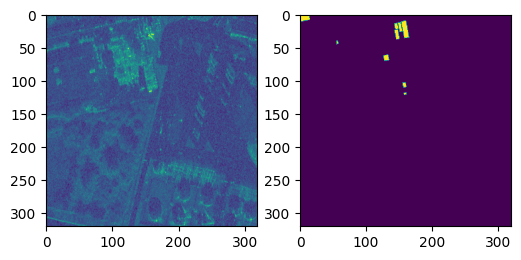

b'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190823065021_20190823065333_tile_9172'


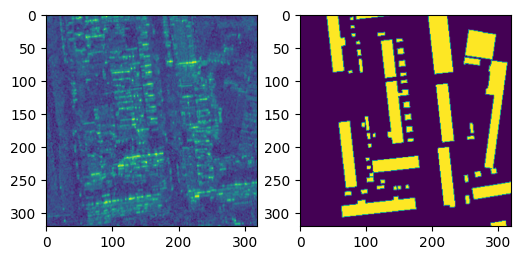

In [5]:
tr_cfg['REDUCE_RES'] = 'random_crop_resize'
model = BFE(tr_cfg, is_log=False, project_name='sn6_aug')
model.load_data()
model.dataloader.preview_train_ds(4)

# Aug TF

In [4]:
def update_aug_tf(
    cfg,
    is_hflip=0,
    is_vflip=0,
    is_rot90=0,
    is_fine_rot=0,
    is_shear_x=0,
    is_shear_y=0,
    rot_range=[-10,10],
    rot_reflect=0,
    shear_range=[-10,10]
):
    """configure augmentations from tf"""
    cfg['IS_HFLIP'] = is_hflip
    cfg['IS_VFLIP'] = is_vflip
    cfg['IS_ROT90'] = is_rot90
    cfg['IS_FINE_ROT'] = is_fine_rot
    cfg['IS_SHEAR_X'] = is_shear_x
    cfg['IS_SHEAR_Y'] = is_shear_y
    cfg['ROT_RANGE'] = rot_range
    cfg['ROT_REFLECT'] = rot_reflect
    cfg['SHEAR_RANGE'] = shear_range
    
    logs = []
    if is_hflip:
        logs.append('hflip')
    if is_vflip:
        logs.append('vflip')
    if is_rot90:
        logs.append('rot90')
    if is_fine_rot:
        logs.append(f'fine_rot: [{rot_range[0]},{rot_range[1]}]')
    if is_shear_x:
        logs.append(f'shear_x: [{shear_range[0]},{shear_range[1]}]')
    if is_shear_y:
        logs.append(f'shear_y: [{shear_range[0]},{shear_range[1]}]')
    print(f'active aug tf: {logs}')
    return cfg

aug_tf_list = [
    [1,0,0,0,0,0,[-10,10],0,[-10,10]], # hflip
    [0,1,0,0,0,0,[-10,10],0,[-10,10]], # vflip
    [0,0,1,0,0,0,[-10,10],0,[-10,10]], # rot90
    [0,0,0,1,0,0,[-10,10],0,[-10,10]], # fine_rot
    [0,0,0,0,1,0,[-10,10],0,[-10,10]], # shearx
    [0,0,0,0,0,1,[-10,10],0,[-10,10]], # sheary
]

# tr_cfg = update_aug_tf(tr_cfg, *aug_tf_list[3])

active aug tf: ['hflip']


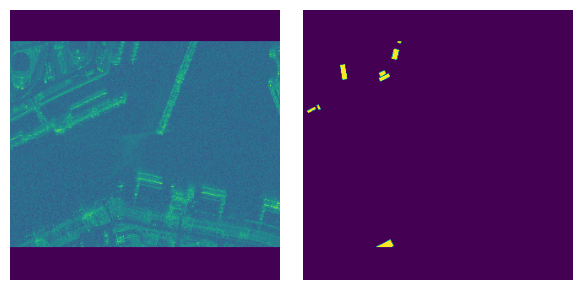

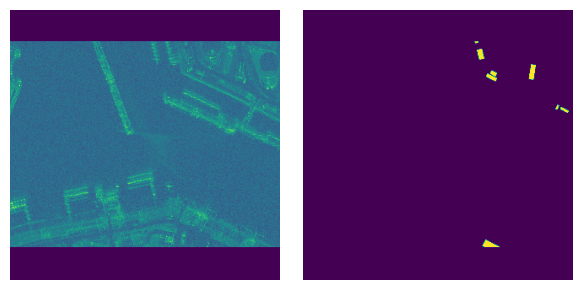

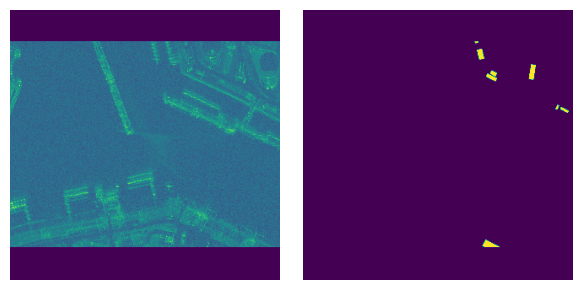

active aug tf: ['vflip']


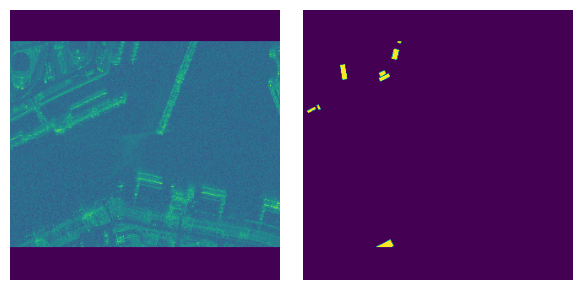

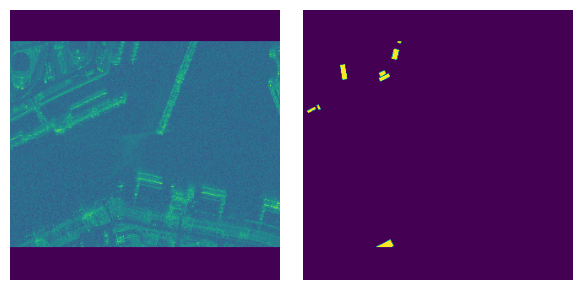

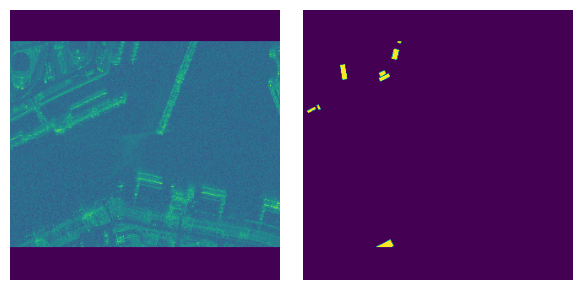

active aug tf: ['rot90']


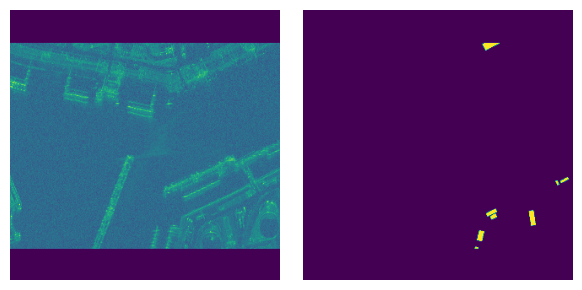

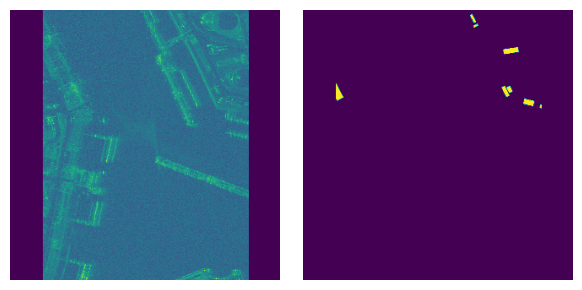

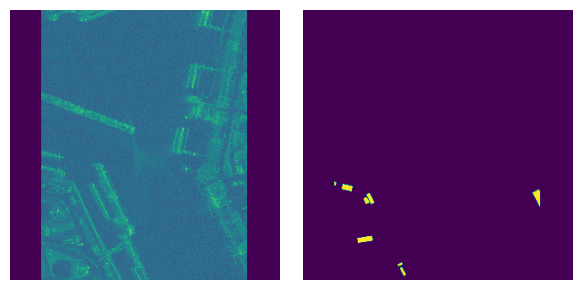

active aug tf: ['fine_rot: [-10,10]']


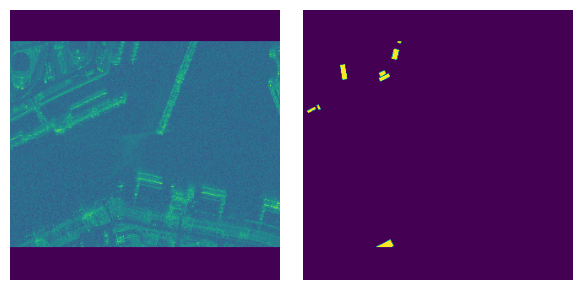

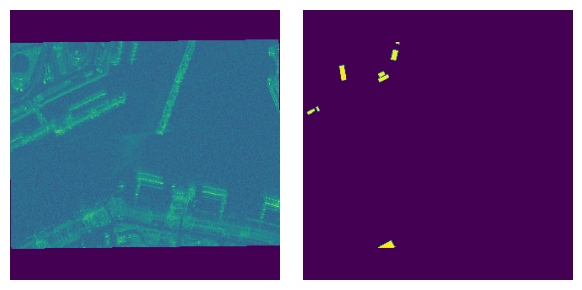

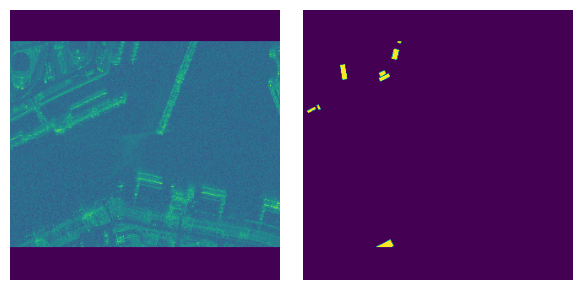

active aug tf: ['shear_x: [-10,10]']


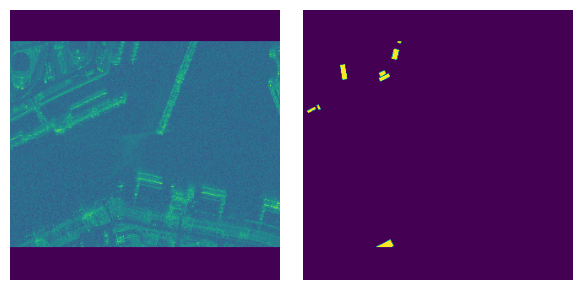

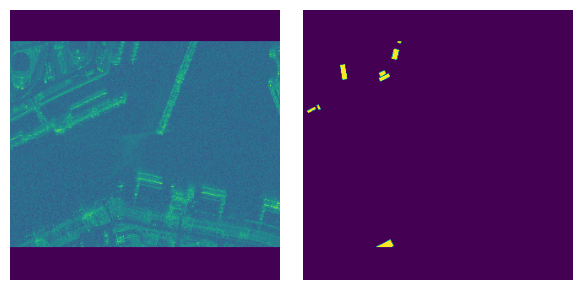

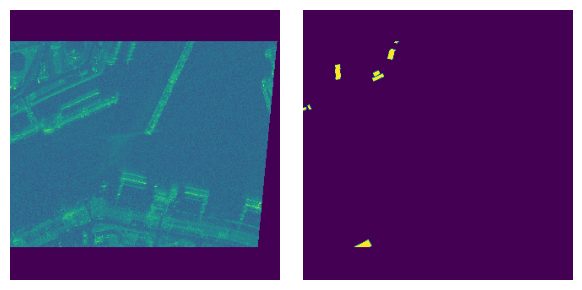

active aug tf: ['shear_y: [-10,10]']


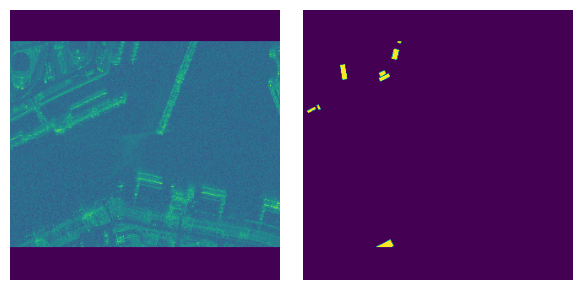

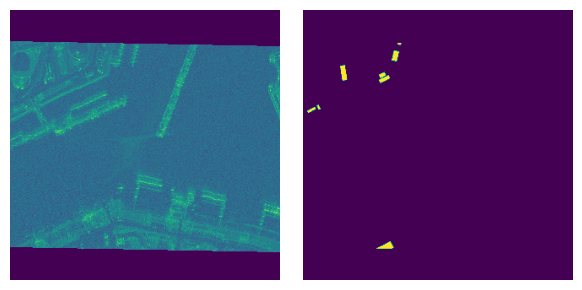

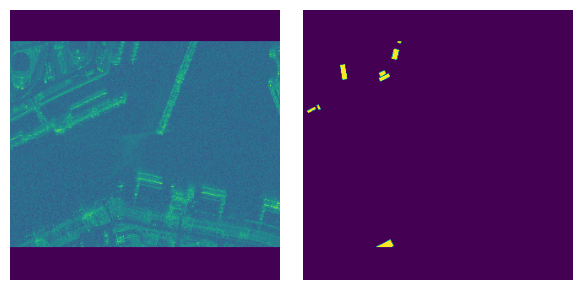

In [5]:
for aug_tf in aug_tf_list:
    tr_cfg = update_aug_tf(tr_cfg, *aug_tf)
    model = BFE(tr_cfg, is_log=False, project_name='sn6_aug')
    model.load_data()
    model.dataloader.preview_train_ds(n_show=1, n_rep=3, min_view=True)

# Aug Albu

In [4]:
def update_aug_albu(
    cfg,
    is_mot_blur=0,
    is_sharpen=0,
    is_clahe=0,
    is_gaus_noise=0,
    is_speckle_noise=0,
    is_coarse_do=0,
):
    """transformation list for augmentations in albu"""
    # update cfg
    cfg['IS_MOT_BLUR'] = is_mot_blur
    cfg['IS_SHARPEN'] = is_sharpen
    cfg['IS_CLAHE'] = is_clahe
    cfg['IS_GAUS_NOISE'] = is_gaus_noise
    cfg['IS_SPECKLE_NOISE'] = is_speckle_noise
    cfg['IS_COARSE_DO'] = is_coarse_do

    logs = []
    if is_mot_blur:
        logs.append('mot_blur')
    if is_sharpen:
        logs.append('sharpen')
    if is_clahe:
        logs.append('clahe')
    if is_gaus_noise:
        logs.append('gaus_noise')
    if is_speckle_noise:
        logs.append('speckle_noise')
    if is_coarse_do:
        logs.append('coarse_do')
    print(f'active aug albu: {logs}')
    return cfg

aug_albu_list = [
    [1,0,0,0,0,0],
    [0,1,0,0,0,0],
    [0,0,1,0,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1],
]

# tr_cfg = update_aug_albu(tr_cfg, *aug_albu_list[5])

active aug albu: ['coarse_do']


active aug albu: ['mot_blur']


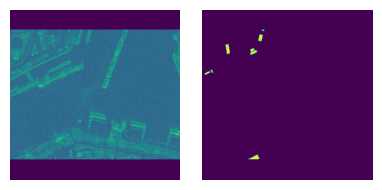

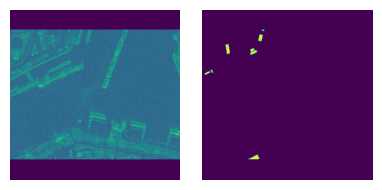

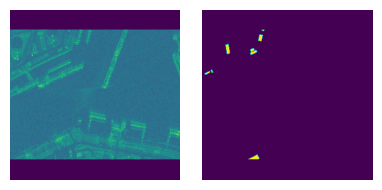

active aug albu: ['sharpen']


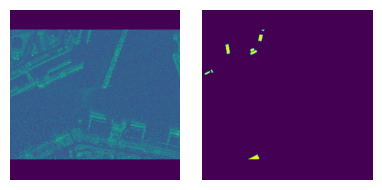

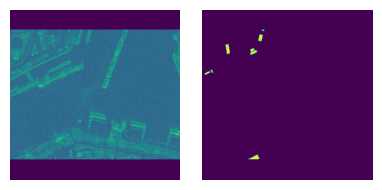

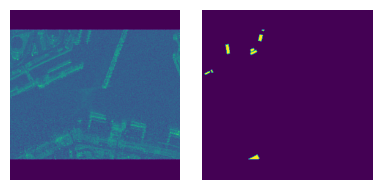

active aug albu: ['clahe']


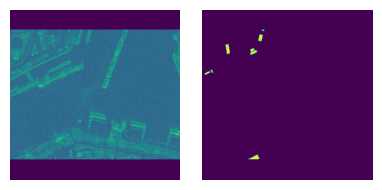

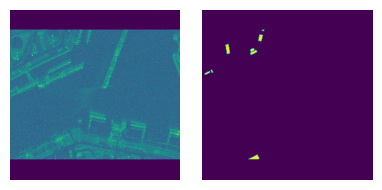

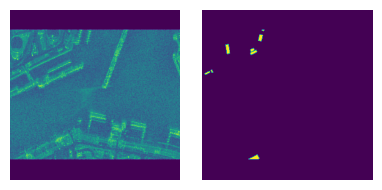

active aug albu: ['gaus_noise']


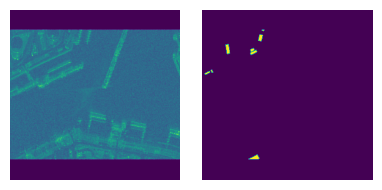

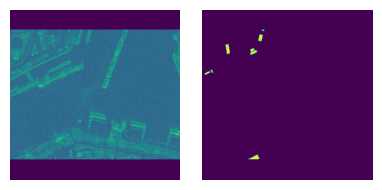

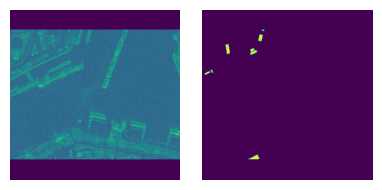

active aug albu: ['speckle_noise']


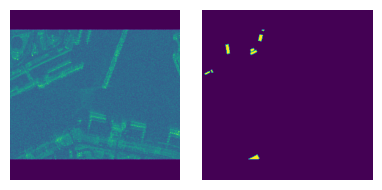

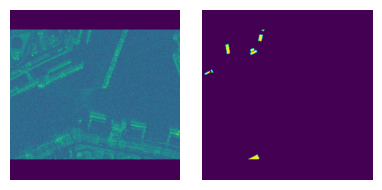

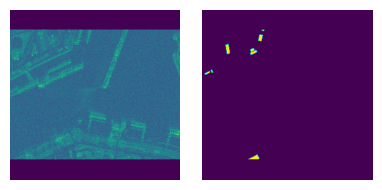

active aug albu: ['coarse_do']


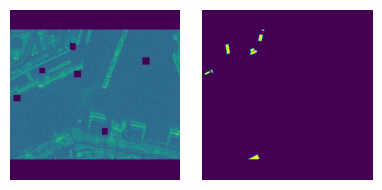

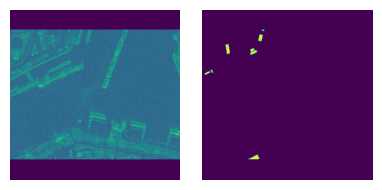

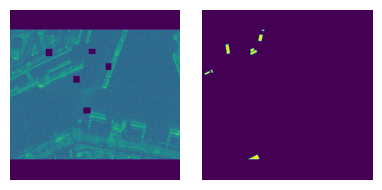

In [5]:
for aug_albu in aug_albu_list:
    tr_cfg = update_aug_albu(tr_cfg, *aug_albu)
    model = BFE(tr_cfg, is_log=False, project_name='sn6_aug')
    model.load_data()
    model.dataloader.preview_train_ds(n_show=1, n_rep=3, min_view=True)